# **CNN 실습**

In [ ]:
import tensorflow as tf
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from tensorflow.keras.models import Sequential  # Model type to be used
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.datasets import mnist     # MNIST dataset is included in Keras
from tensorflow.keras.utils import to_categorical, plot_model

print(tf.__version__) # find the version number (should be 2.x+)

# 그래픽카드 유무 확인 및 메모리 확장 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  print('사용가능한 GPU 갯수: ',len(gpus), '\n')
      
  try:
    # 프로그램이 실행되어 더 많은 GPU 메모리가 필요하면, 텐서플로 프로세스에 할당된 GPU 메모리 
    # 영역을 확장할 수있도록 허용
    tf.config.experimental.set_memory_growth(gpus[0], True)

  except RuntimeError as e:
    # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
    print(e)

# 설치된 GPU 상세내용 확인
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.6.0
사용가능한 GPU 갯수:  1 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16420556867291214398
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11345264640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5124517218430880676
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


## **이미지 미리보기**

X_train shape: (60000, 28, 28)	Y_train shape: (60000,)

X_test shape: (10000, 28, 28)	Y_test shape: (10000,)


 [5 0 4 1 9 2 1 3 1]

 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253

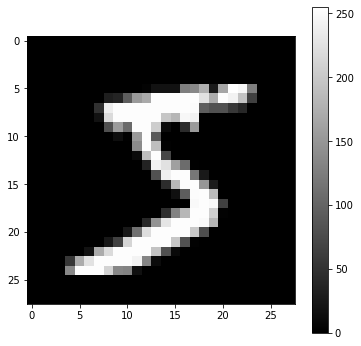

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Original 데이터 확인
print('X_train shape: {}\tY_train shape: {}\n'.format(x_train.shape, y_train.shape))
print('X_test shape: {}\tY_test shape: {}\n'.format(x_test.shape, y_test.shape))

np.set_printoptions(linewidth=600, precision=2) # linewidth = 라인 최대 글자수, precision: 소수점이하 자리수

# Browsing Original Dataset

print('\n',y_train[0: 9])
print('\n',x_train[0])

fig = plt.figure(figsize=(6,6)) # Width, height in inches.
fig.subplots_adjust(hspace=0.7)

plt.imshow(x_train[0], cmap='gray') 
plt.colorbar()   
plt.show()

## **데이터 전처리**

In [ ]:
# Step 1 : Data Preparation
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

num_labels = len(np.unique(y_train))

# Reshape (CNN은 3차원으로 )
image_size = x_train.shape[1]

x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])

# Normalizing
x_train = x_train/255.
x_test = x_test/255.

# One-Hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 데이터 확인
print('X_train shape: {}\tY_train shape: {}\n'.format(x_train.shape, y_train.shape))
print('X_test shape: {}\tY_test shape: {}\n'.format(x_test.shape, y_test.shape))

X_train shape: (60000, 28, 28, 1)	Y_train shape: (60000, 10)

X_test shape: (10000, 28, 28, 1)	Y_test shape: (10000, 10)



## **모델 구성**

In [ ]:
# Step 2 : Model construction

input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3 # 한 필터의 사이즈 3 by 3  # 28 - 3 + 1 = 26
pool_size = 2 # 4를 1로 줄임
filters = 64 # 3 * 3 필터가 64개
dropout = 0.2

# Model is a stack of CNN-ReLU-MaxPooling

model = Sequential()

model.add(Conv2D(filters = filters,
                 kernel_size = kernel_size,
                 activation = 'relu',
                 input_shape = input_shape)) # 26 * 26 * 64 을 결과가 나옴
model.add(MaxPooling2D(pool_size))

model.add(Conv2D(filters = filters,
                 kernel_size = kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))

model.add(Conv2D(filters = filters,
                 kernel_size = kernel_size,
                 activation = 'relu'))

# Dense는 1차원 벡터이기에 연결하기 위해 평탄화
model.add(Flatten())
print(model.shape)
# dropout added as regularizer
# 드롭아웃 추가
model.add(Dropout(dropout))

# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0

## **모델 컴파일**

In [ ]:
# Step 3 : Model compile

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])


## **모델 학습**

In [ ]:
import time
start = time.time()

# Step 4: Model fit

model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

end = time.time()
print('Execution time in seconds =',end-start)

Epoch 1/10
469/469 [==============================] - 34s 11ms/step - loss: 0.2678 - accuracy: 0.9186
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0729 - accuracy: 0.9773
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0519 - accuracy: 0.9840
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0406 - accuracy: 0.9875
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0340 - accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0293 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0221 - accuracy: 0.9929
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0188 - accuracy: 0.9936
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0173 - accur

In [ ]:
# 모델 평가 출력은 99.2%의 최대 테스트 정확도를 보여주며, 이는 3계층 네트워크에서 달성될 수 있습니다.
# Adam Optimizer(드롭아웃=0.2)를 사용하여 레이어당 64개의 피쳐 맵을 제공합니다. CNN은 매개 변수가 더 효율적이고 더 높습니다.
# MLP보다 정확합니다.
# CNN도 마찬가지로 순차 데이터, 이미지, 비디오에서 표현을 학습하는 데 적합합니다.

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print('\nTest accuracy : %.1f%%' %(100.0 * acc))


Test accuracy : 99.2%


# **How do Convolutional Neural Networks work?**

Link 1: [How do Convolutional Neural Networks work?](https://e2eml.school/how_convolutional_neural_networks_work.html)

Link 2: [Youtube Video](https://www.youtube.com/watch?v=FmpDIaiMIeA&t=103s)


# 작동원리

  1. Convolution
  2. Pooling
  3. ReLU Activation
  4. Deep Learning
  5. Fully Connected Layers

## Convolution

아래 그림과 같이 컴퓨터에게 두 이미지중 하나를 제시하고 X와 O를 구분하게 하는 단순한 모형을 생각해보자.

<img src = 'https://e2eml.school/images/cnn1.png'>

제시되는 이미지는 축소(shrunken), 약간의 변형(deformed), 이동(shifted), 회전(rotation)이 된 그림일 수도 있다.

<img src = "https://e2eml.school/images/cnn2.png">

컴퓨터에게 이미지는 각 pixel에 숫자가 들어간 2차원 행렬로 인식된다. 우리 예에서는 흰색은 1, 흑색은 -1로 표시하였다.

## Features (Patterns, Representations)
<img src='https://e2eml.school/images/cnn3.png'>


CNN은 이미지를 여러개의 조각(patch, piece)으로 나누어 piece-by-piece로 패턴을 비교합니다.

  - CNN은 전체 이미지 매칭 방식보다 유사성을 훨씬 더 잘 볼 수 있습니다.

<img src = 'https://e2eml.school/images/cnn4.png'>

  - 각 기능은 작은 2차원 값의 배열인 미니 이미지와 같습니다.
  - 기능은 이미지의 공통적인 측면과 일치합니다.


X의 경우 대각선(Diagonal Lines) feature와 크로스(X) feature가 그림에서 나온 여러개의 패치에서 일치 또는 유사한 경우를 찾게될 것이다.

1. Convolution

이미지가 처음 제시되었을 때 CNN은 정확히 어느 부분에 주어진 Feature가 match되는지 알 수 없기때문에 부분부분 옮겨 가면서 일치 또는 유사 여부를 확인하게 된다.이 과정에 사용되는 수학이 Convolution(합성곱)이며 이때 부분 부분 옮겨 가면서 사용되는 Feature를 필터(Filters)라고 한다.

<img src="https://e2eml.school/images/cnn6.png">



## 합성곱 연산

    ```
    이미지의 패치와 피쳐의 일치를 계산하려면
    (1) 피쳐의 각 픽셀에 이미지의 해당 픽셀 값을 곱하기만 하면 됩니다.
    (2) 그 다음 답을 합산하여 피쳐의 총 픽셀 수로 나눈다.
    ```

- 일치하는 모든 픽셀은 1이 됩니다.
- 마찬가지로 불일치는 -1입니다.
- 피쳐의 모든 픽셀이 일치하는 경우 해당 픽셀을 합산하여 총 픽셀 수로 나누면 1이 됩니다.
- 마찬가지로 기능의 픽셀 중 이미지 패치와 일치하는 것이 없으면 답은 -1입니다.

이렇게 해서 얻어진 2차원 행렬은 적용된 필터와 일치/유사/불일치하는지를 보여주는 지도(map)라 할 수 있으며 또한 원이미지에 필터를 적용한 축소된 이미지라 할 수있다.

- 1에 가까운 값은 강한 일치를 나타냅니다.
- -1에 가까운 값은 우리 기능의 사진에 대한 강한 일치를 보여줍니다.
- 0에 가까운 값은 일치하는 항목이 없음을 나타냅니다.

이 과정을 우리가 설정한 모든 필터(우리의 예에서는 3개)에 적용하면 이미지 셋( a set of 3 filtered images)을 구할 수 있다.

<img src='https://e2eml.school/images/cnn7.png'>


    ```
    CNN이 어떻게 컴퓨터를 독차지 하는지 쉽게 알 수 있다.
    냅킨 뒷면에 CNN을 스케치할 수 있지만 덧셈, 곱셈, 나눗셈의 수는 빠르게
    증가할 수 있습니다.
    ```

## Pooling

  Pooling은 CNN의 핵심 요소중 하나로서 큰 사이즈의 이미지를 중요한 정보는 유지하면서 축소시키려는 기법이다.

  <img src='https://e2eml.school/images/cnn8.png'>

- 실제로는 측면의 창 2~3픽셀과 2픽셀의 단계가 잘 작동합니다.
- 풀링 후 이미지는 약 1/4의 픽셀을 가집니다.
- 각 창의 최대값을 유지하기 때문에 각 기능의 최적 맞춤을 창 내에서 유지합니다.
- 풀링 레이어는 이미지 또는 이미지 컬렉션에서 풀링을 수행하는 작업입니다.
- 출력은 이미지 수는 같지만 각각 더 적은 픽셀을 가집니다.
- 이는 컴퓨팅 부하 관리에도 도움이 됩니다.

  <img src='https://e2eml.school/images/cnn9.png'>



## Rectified Linear Units (ReLU)

  <img src='https://e2eml.school/images/cnn10.png'>
  
- 이 프로세스에서 작지만 중요한 구성 요소는 교정 선형 장치 또는 ReLU입니다.
- 또한 수학은 매우 간단합니다. 음수가 발생할 때마다 0으로 바꿉니다.
    
$$
R(z) =  max(z,0) =
  \begin{cases}
			0, & \text{for $z \lt 0$}\\
      z, & \text{for $z \ge 0$}
	\end{cases}
$$

- 이것은 학습된 값이 0에 가깝게 고착되거나 무한대로 폭발하는 것을 방지함으로써 CNN이 수학적으로 건강하게 유지하도록 도와줍니다. CNN의 핵심이죠

  <img src='https://e2eml.school/images/cnn11.png'>

  ReLU 레이어의 출력은 모든 음수 값이 제거된 상태에서 입력되는 것과 크기가 같습니다.


## Deep learning

  <img sr = 'https://e2eml.school/images/cnn12.png'>

- 각 계층(2차원 배열)에 대한 입력은 출력(2차원 배열)과 매우 유사합니다. 그렇기 때문에 우리는 그것들을 레고 벽돌처럼 쌓을 수 있습니다.
- 원시 이미지는 필터링, 수정 및 풀링되어 축소된 피쳐 필터링된 이미지 세트를 만듭니다. 이것은 필터링되고 축소될 수 있습니다.
- 매번 기능이 더 커지고 복잡해지며 이미지는 더 작아집니다.
- 이렇게 하면 아래쪽 레이어가 가장자리나 밝은 점과 같은 이미지의 단순한 측면을 나타낼 수 있습니다.
- 레이어가 높을수록 모양이나 패턴과 같은 이미지의 정교한 측면을 나타낼 수 있습니다. 
- 예를 들어, 사람 얼굴에 대해 훈련된 CNN에서 가장 높은 층은 분명히 얼굴과 같은 패턴을 나타냅니다.


  <img src='https://e2eml.school/images/cnn18.png'>


## Fully connected layers (Dense Layers)

완전히 연결된 레이어는 높은 수준의 필터링된 이미지를 가져와서 투표로 변환합니다. <br>우리의 경우, 우리는 X와 O의 두 종류 중 하나만 결정하면 됩니다.

  <img src='https://e2eml.school/images/cnn13.png'>

새로운 이미지가 CNN에 제시되면 맨 마지막에 완전히 연결된 레이어에 도달할 때까지 하단 레이어를 통과합니다.<br> 그런 다음 선거가 열린다.

그러나 이 과정이 완전히 민주적인 것은 아니다.<br> 어떤 값은 이미지가 X일 때 다른 값보다 훨씬 더 잘 알고, 어떤 값은 특히 이미지가 O일 때 잘 알고 있습니다.

이 사람들은 다른 사람들보다 더 많은 표를 얻습니다.<br> 이러한 투표는 각 가치와 각 범주 사이의 가중치 또는 연관 강도로 표현됩니다.

실제로 각 중간 레이어가 팬텀 "숨겨진" 카테고리에 투표하면서 완전히 연결된 여러 레이어가 함께 쌓이는 경우가 많습니다.

실제로 각 추가 계층을 통해 네트워크는 보다 정교한 기능의 조합을 학습하여 보다 나은 의사결정을 내릴 수 있습니다.


  <img src='https://e2eml.school/images/cnn14.png'>



## Backpropagation

우리의 이야기는 잘 채워지고 있지만, 여전히 큰 구멍이 있다.기능의 출처는 어디입니까?<br> 완전히 연결된 레이어의 중량은 어떻게 찾을 수 있을까요?<br>

만약 이 모든 것이 손으로 선택되어야 한다면, CNN은 그들보다 훨씬 덜 인기가 있을 것이다.<br> 다행히도, 역전파라고 불리는 기계학습 마법을 우리에게도 효과가 있습니다.<br>



모든 기능의 모든 픽셀과 완전히 연결된 모든 계층의 모든 무게가 임의의 값으로 설정되는 훈련되지 않은 CNN부터 시작합니다.<br> 그런 다음 차례로 이미지를 전송합니다.<br>


CNN이 처리하는 각각의 이미지는 투표 결과를 낳습니다.<br> 잘못된 투표의 양, 오류는 우리의 용모와 체중이 얼마나 좋은지를 말해줍니다.<br>


그런 다음 특징과 가중치를 조정하여 오차를 줄일 수 있습니다.<br> 각 값은 조금 더 높고 낮게 조정되며 매번 새 오차가 계산됩니다. <br>


오류를 줄일 수 있는 조정은 유지됩니다.<br>


모든 컨볼루션 레이어의 모든 피쳐 픽셀과 완전히 연결된 레이어의 모든 가중치에 대해 이 작업을 수행한 후 새로운 가중치가 해당 이미지에 대해 약간 더 잘 작동하는 답을 제공합니다. <br>


그런 다음 라벨이 지정된 영상 세트의 각 후속 영상에서 이 작업이 반복됩니다.<br>


<hr>

## Hyperparameters

불행하게도 CNN의 모든 측면을 그렇게 직설적으로 배울 수 있는 것은 아니다.<br> CNN 디자이너가 내려야 할 결정의 목록은 여전히 길다.<br>
각 Convolution 계층에 대해 몇 개의 기능이 있습니까?<br> 각 기능에 몇 개의 픽셀이 있습니까?<br>
각 풀링 도면층에 대해 창 크기를 선택하십시오. 무슨 보폭?<br>
완전히 연결된 각 층에 대해 숨겨진 뉴런은 몇 개입니까?<br>
이 외에도 다음과 같은 높은 수준의 아키텍처 의사 결정이 있습니다.<br> 각 레이어를 몇 개씩 포함할까요?|<br>